In [112]:
import pandas as pd
import numpy as np 

import scipy.stats as stats

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer 

In [113]:
df1= pd.read_csv("D:\\train (5).csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
df = pd.read_csv("D:\\train (5).csv",usecols=['Age','Survived','Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [115]:
x=df.drop(["Survived"],axis=1)
x.head(10)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708


In [116]:
y=df['Survived']
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [117]:
x.isnull().sum()

Age     177
Fare      0
dtype: int64

In [118]:
x['Age'].fillna(x['Age'].mean(),inplace=True)
x.isnull().sum()

Age     0
Fare    0
dtype: int64

In [119]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)
print(x_train.head(10))
print()
print()
print(x_test.head(10))

           Age      Fare
108  38.000000    7.8958
364  29.699118   15.5000
438  64.000000  263.0000
225  22.000000    9.3500
473  23.000000   13.7917
816  23.000000    7.9250
832  29.699118    7.2292
238  19.000000   10.5000
483  63.000000    9.5875
375  29.699118   82.1708


           Age      Fare
790  29.699118    7.7500
207  26.000000   18.7875
710  24.000000   49.5042
462  47.000000   38.5000
40   40.000000    9.4750
203  45.500000    7.2250
715  19.000000    7.6500
666  25.000000   13.0000
642   2.000000   27.9000
332  38.000000  153.4625


C:\Users\patel\AppData\Local\Temp\ipykernel_10656\3063872305.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


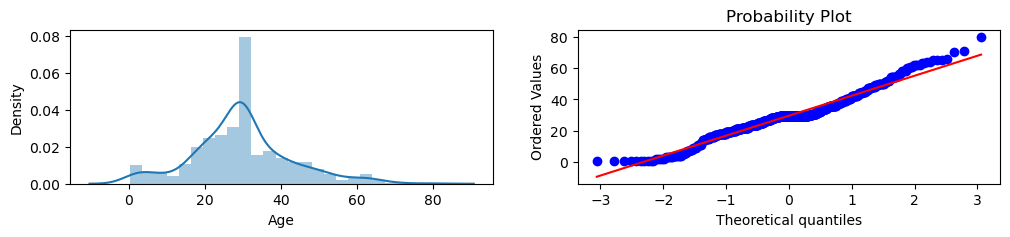

In [120]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(x_train['Age'])

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)

plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_10656\378755878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


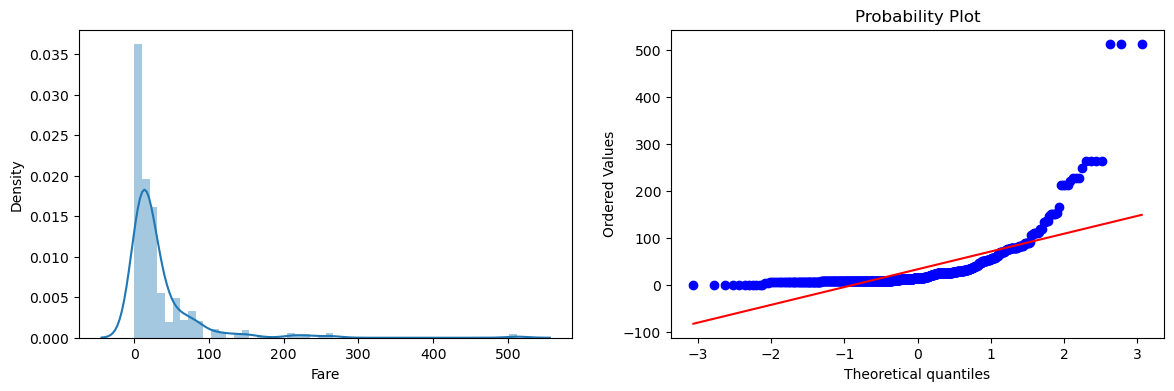

In [121]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)

plt.show()

In [122]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [123]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
y_predict1 = clf1.predict(x_test)
y_predict2 = clf2.predict(x_test)

In [125]:
print("logistic accuracy",accuracy_score(y_test,y_predict1))
print("decision tree accuracy",accuracy_score(y_test,y_predict2))

logistic accuracy 0.6492537313432836
decision tree accuracy 0.6567164179104478


In [126]:
#log tranformation 

In [127]:
trf1 = ColumnTransformer([('log transformer',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [128]:
x_train_trans = trf1.fit_transform(x_train)
x_test_trans = trf1.fit_transform(x_test) 

In [129]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train_trans , y_train)
clf2.fit(x_train_trans , y_train)

y_predict1 = clf1.predict(x_test_trans)
y_predict2 = clf2.predict(x_test_trans)

print("logistic accuracy",accuracy_score(y_test,y_predict1))
print("decision tree accuracy",accuracy_score(y_test,y_predict2))

logistic accuracy 0.6791044776119403
decision tree accuracy 0.6716417910447762


In [134]:
def transformation_apply(transform):
    x = df.iloc[:,:1:3]
    y=df.iloc[:,0]

    trf1 = ColumnTransformer([('log',FunctionTransformer(transformer),['Fare'])],remainder='passthrough')

    x_trans = trf1.fir_transform(x)

    clf = LogisticRegression()

    print("cross val accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    

In [1]:
#transformation_apply(np.cos)